In [ ]:
# Author       : Shefali Mangal
# E-Mail       : shefalimangal24@gmail.com
# Contact      : +91-9165001002
# Designation  : Software Developer
# Decision Tree for Financial Loam EMI default detection
# Data         : bank.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snsa
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [2]:
# load data file
bank = pd.read_csv("bank.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
#check if data set contains null values - Nothing found!

bank[bank.isnull().any(axis=1)].count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [4]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


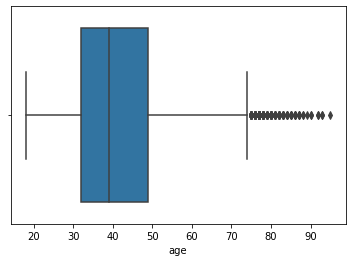

In [5]:
#box-plot for age
#a = sns.boxplot(x=bank["age"])
#a = sns.boxplot(bank["age"])
a = sns.boxplot(bank.age)

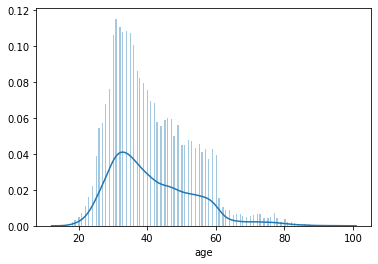

In [6]:
#Distribution of age


#sns.distplot(bank.age, bins=100)
#sns.distplot(bank["age"], bins=100)
sns.distplot(bank.age, bins=200)

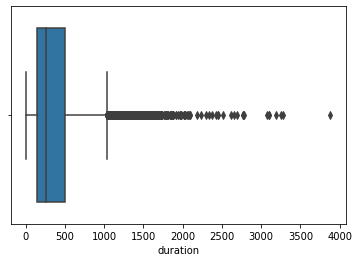

In [7]:
#box-plot for duration
a = sns.boxplot(bank["duration"])

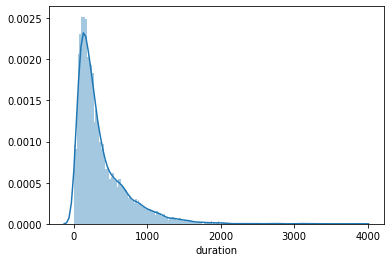

In [8]:
#Distribution of duration
sns.distplot(bank["duration"], bins=200)

# Convert categorical data

In [9]:
bank_data = bank.copy()
print(bank_data)

       age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \

# EDA

In [10]:
# Explore People who made a deposit Vs Job category

In [11]:
for col in bank.columns:
    print(col)

age
job
marital
education
default
balance
housing
loan
contact
day
month
duration
campaign
pdays
previous
poutcome
deposit


In [12]:
jobs = ['management','blue-collar','technician','admin.','services','retired','self-employed','student',
        'unemployed','entrepreneur','housemaid','unknown']

for j in jobs:
    print("{:15} : {:5}".format(j, len(bank_data[(bank_data.deposit == "yes") & (bank_data.job == j)])))

management      :  1301
blue-collar     :   708
technician      :   840
admin.          :   631
services        :   369
retired         :   516
self-employed   :   187
student         :   269
unemployed      :   202
entrepreneur    :   123
housemaid       :   109
unknown         :    34


In [13]:
# Different types of job categories and their counts

In [14]:
bank_data.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [15]:
# Combine similar jobs into categiroes

In [16]:
bank_data['job'] = bank_data['job'].replace(['management','amin.'], 'white-collar')
bank_data['job'] = bank_data['job'].replace(['services','housemaid'], 'pink-collar')
bank_data['job'] = bank_data['job'].replace(['retired','student', 'unemployed', 'unknown'], 'other')

In [17]:
bank_data.job.value_counts()

white-collar     2566
blue-collar      1944
technician       1823
other            1565
admin.           1334
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

-------poutcome--------------

In [18]:
print(bank_data.poutcome)

0        unknown
1        unknown
2        unknown
3        unknown
4        unknown
          ...   
11157    unknown
11158    unknown
11159    unknown
11160    failure
11161    unknown
Name: poutcome, Length: 11162, dtype: object


In [19]:
bank_data.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [20]:
# Combine 'unknown' and 'other' as 'other' isn't really match with either 'success' or 'failure'

In [21]:
bank_data['poutcome']= bank_data['poutcome'].replace(['other'], 'unknown')

In [22]:
bank_data.poutcome.value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

-----------contact---------------------------

In [23]:
# Drop 'contact', as every participant has been contacted. 

In [24]:
bank_data.drop('contact',axis=1, inplace=True)

----------------default------------------

In [25]:
# values for "default" : yes/no

In [26]:
bank_data.default

bank_data['default_new'] = bank_data['default'].map({'yes':1 , 'no':0})
bank_data.drop('default',axis=1,inplace = True)
print(bank_data.default_new)

0        0
1        0
2        0
3        0
4        0
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: default_new, Length: 11162, dtype: int64


------housing-----------

In [27]:
# values for "housing" : yes/no
bank_data.housing

0        yes
1         no
2        yes
3        yes
4         no
        ... 
11157    yes
11158     no
11159     no
11160     no
11161     no
Name: housing, Length: 11162, dtype: object

In [28]:
bank_data.housing

bank_data['housing_new'] = bank_data['housing'].map({'yes':1 , 'no':0})
bank_data.drop('housing',axis=1,inplace = True)
print(bank_data.housing_new)

0        1
1        0
2        1
3        1
4        0
        ..
11157    1
11158    0
11159    0
11160    0
11161    0
Name: housing_new, Length: 11162, dtype: int64


---------------loan-------------

In [29]:
# values for "loan" : yes/no
bank_data.loan

0         no
1         no
2         no
3         no
4         no
        ... 
11157     no
11158     no
11159     no
11160    yes
11161     no
Name: loan, Length: 11162, dtype: object

In [30]:
bank_data['loan_new'] = bank_data['loan'].map({'yes':1 , 'no':0})
bank_data.drop('loan',axis=1,inplace = True)
print(bank_data.loan_new)

0        0
1        0
2        0
3        0
4        0
        ..
11157    0
11158    0
11159    0
11160    1
11161    0
Name: loan_new, Length: 11162, dtype: int64


-----------------month,day-------------

In [31]:
# day  : last contact day of the month
# month: last contact month of year
# Drop 'month' and 'day' as they don't have any intrinsic meaning

In [32]:
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

-------------deposit---------------

In [33]:
# values for "deposit" : yes/no
bank_data.deposit

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
11157     no
11158     no
11159     no
11160     no
11161     no
Name: deposit, Length: 11162, dtype: object

In [34]:
bank_data['deposit_new']= bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit',axis = 1, inplace=True)
bank_data.deposit_new

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit_new, Length: 11162, dtype: int64

-------------------pdays-------------

In [35]:
# pdays: number of days that passed by after the client was last contacted from a previous campaign
#       -1 means client was not previously contacted

In [36]:
bank_data.pdays

0         -1
1         -1
2         -1
3         -1
4         -1
        ... 
11157     -1
11158     -1
11159     -1
11160    172
11161     -1
Name: pdays, Length: 11162, dtype: int64

In [37]:
print('Customers that have not been contacted before: ',len(bank_data[bank_data.pdays==-1]))
print('Maximum value on pdays: ', bank_data.pdays.max())

Customers that have not been contacted before:  8324
Maximum value on pdays:  854


In [38]:
# Map padys=-1 into a large value (10000 is used) to indicate that it is so far in the past that it has no effect

In [39]:
bank_data.loc[bank_data['pdays']==-1, 'pdays']=10000

In [40]:
# Create a new column: recent_pdays 
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)


#Drop pdays
bank_data.drop('pdays', axis=1,inplace=True)

In [41]:
bank_data.tail()

,age,job,marital,education,balance,duration,campaign,previous,poutcome,default_new,housing_new,loan_new,deposit_new,recent_pdays
11157,33,blue-collar,single,primary,1,257,1,0,unknown,0,1,0,0,0.000100
11158,39,pink-collar,married,secondary,733,83,4,0,unknown,0,0,0,0,0.000100
11159,32,technician,single,secondary,29,156,2,0,unknown,0,0,0,0,0.000100
11160,43,technician,married,secondary,0,9,2,5,failure,0,0,1,0,0.005814
11161,34,technician,married,secondary,0,628,1,0,unknown,0,0,0,0,0.000100


--------------convert to dummy values------------------

In [42]:
# Convert categorical variables to dummies

In [43]:
bank_dummies = pd.get_dummies(bank_data, columns = ['job', 'marital', 'education', 'poutcome'])
bank_dummies.head()

,age,balance,duration,campaign,previous,default_new,housing_new,loan_new,deposit_new,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,0,0,0,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
2,41,1270,1389,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
3,55,2476,579,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
4,54,184,673,2,0,0,0,0,1,0.0001,...,0,1,0,0,0,1,0,0,0,1


In [44]:
bank_dummies = pd.get_dummies(bank_data, columns = ['job', 'marital', 'education', 'poutcome'],prefix = ['job', 'marital', 'education', 'poutcome'])
bank_dummies.head()

,age,balance,duration,campaign,previous,default_new,housing_new,loan_new,deposit_new,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,0,0,0,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
2,41,1270,1389,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
3,55,2476,579,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
4,54,184,673,2,0,0,0,0,1,0.0001,...,0,1,0,0,0,1,0,0,0,1


In [45]:
bank_dummies.shape

(11162, 28)

In [46]:
bank_dummies.describe()

,age,balance,duration,campaign,previous,default_new,housing_new,loan_new,deposit_new,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,0.832557,0.015051,0.473123,0.130801,0.473840,0.003124,...,0.115839,0.568984,0.315176,0.134385,0.490593,0.330496,0.044526,0.110016,0.095951,0.794033
std,11.913369,3225.413326,347.128386,2.722077,2.292007,0.121761,0.499299,0.337198,0.499338,0.030686,...,0.320047,0.495241,0.464607,0.341080,0.499934,0.470413,0.206270,0.312924,0.294537,0.404424
min,18.000000,-6847.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,138.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,550.000000,255.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,1708.000000,496.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.001919,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,63.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Observation on whole populations

In [47]:
## Scatterplot showing age and balance


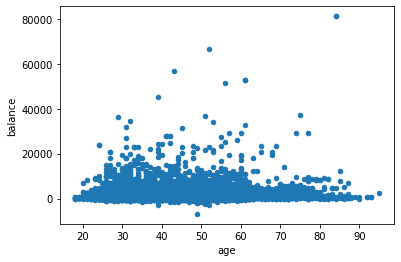

In [48]:
bank_dummies.plot(kind = 'scatter', x='age',y='balance')


# Across all ages, majority of people have savings of less than 20000.

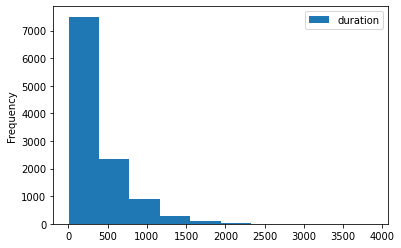

In [49]:
bank_dummies.plot(kind='hist',x = 'poutcome_success', y = 'duration')

# Analysis on people who sign up for a term deposit

In [50]:
# People who sign up to a term deposite

In [51]:
bank_dummies[bank_data.deposit_new == 1].describe()

,age,balance,duration,campaign,previous,default_new,housing_new,loan_new,deposit_new,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000,...,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,537.294574,2.141047,1.170354,0.009832,0.365854,0.091511,1.0,0.004238,...,0.117603,0.520892,0.361505,0.111741,0.463226,0.377387,0.047646,0.116846,0.184912,0.698242
std,13.497781,3501.104777,392.525262,1.921826,2.553272,0.098676,0.481714,0.288361,0.0,0.035686,...,0.322167,0.499611,0.480482,0.315078,0.498693,0.484779,0.213036,0.321267,0.388263,0.459064
min,18.000000,-3058.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,210.000000,244.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,733.000000,426.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,50.000000,2159.000000,725.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.005128,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,32.000000,58.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
# People signed up to a term deposite having a personal loan (loan_new) and housing loan (housing_new)

In [53]:
len(bank_dummies[(bank_dummies.deposit_new == 1) & (bank_dummies.loan_new) & (bank_dummies.housing_new)])


265

In [54]:
# People signed up to a term deposite with a credit default 

In [55]:
len(bank_dummies[(bank_dummies.deposit_new == 1) & (bank_dummies.default_new == 1)])



52

In [56]:
# Bar chart of job Vs deposite

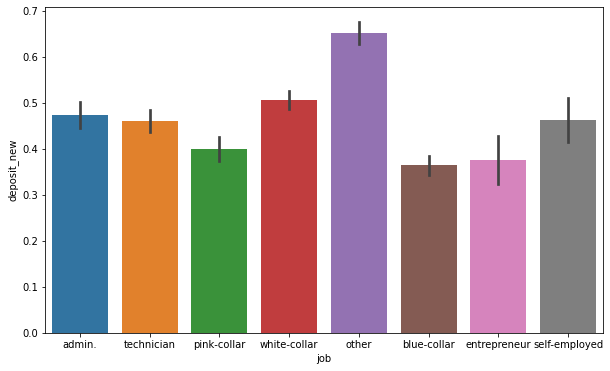

In [61]:
plt.figure(figsize = (10,6))
sns.barplot(x='job', y = 'deposit_new', data = bank_data)

In [ ]:
# Bar chart of "previous outcome" Vs "call duration"

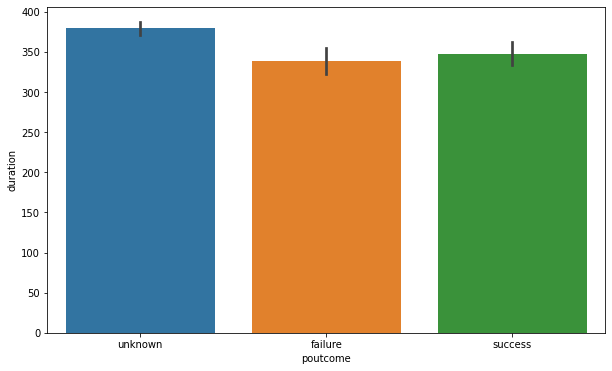

In [62]:
plt.figure(figsize = (10,6))
sns.barplot(x='poutcome', y='duration', data=bank_data)


# Classification

In [63]:
#make a copy

In [64]:
bankc1 = bank_dummies

In [65]:
#the correlation matrix

In [66]:
cr = bankc1.corr()
cr

,age,balance,duration,campaign,previous,default_new,housing_new,loan_new,deposit_new,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
age,1.000000,0.112300,0.000189,-0.005278,0.020169,-0.011425,-0.168700,-0.031418,0.034901,0.019102,...,0.186349,0.318436,-0.467799,0.231150,-0.094400,-0.101372,0.077761,-0.008071,0.062114,-0.038992
balance,0.112300,1.000000,0.022436,-0.013894,0.030805,-0.060954,-0.077092,-0.084589,0.081129,-0.004379,...,-0.017586,0.025431,-0.014994,-0.000673,-0.070609,0.069128,0.014596,0.001695,0.045603,-0.034524
duration,0.000189,0.022436,1.000000,-0.041557,-0.026716,-0.009760,0.035051,-0.001914,0.451919,-0.014868,...,0.021364,-0.036179,0.023847,0.013405,0.003820,-0.006813,-0.015887,-0.033966,-0.022578,0.042725
campaign,-0.005278,-0.013894,-0.041557,1.000000,-0.049699,0.030975,0.006660,0.034722,-0.128081,-0.026296,...,-0.006828,0.047722,-0.046165,0.019915,-0.013834,-0.005427,0.012976,-0.080188,-0.091807,0.128907
previous,0.020169,0.030805,-0.026716,-0.049699,1.000000,-0.035273,-0.000840,-0.022668,0.139867,0.122076,...,-0.026566,-0.005176,0.023817,-0.024852,-0.004620,0.028146,-0.011898,0.335870,0.325477,-0.496921
default_new,-0.011425,-0.060954,-0.009760,0.030975,-0.035273,1.000000,0.011076,0.076434,-0.040680,-0.011290,...,0.019633,-0.006819,-0.006255,0.013858,-0.000618,-0.011768,0.005421,-0.024650,-0.040272,0.048403
housing_new,-0.168700,-0.077092,0.035051,0.006660,-0.000840,0.011076,1.000000,0.076761,-0.203888,-0.029350,...,0.007430,0.036305,-0.043817,0.017002,0.118514,-0.114955,-0.053191,0.087741,-0.136299,0.031375
loan_new,-0.031418,-0.084589,-0.001914,0.034722,-0.022668,0.076434,0.076761,1.000000,-0.110580,-0.012697,...,0.026463,0.044148,-0.065288,0.006854,0.079583,-0.067513,-0.050249,0.006264,-0.080370,0.053686
deposit_new,0.034901,0.081129,0.451919,-0.128081,0.139867,-0.040680,-0.203888,-0.110580,1.000000,0.034457,...,0.005228,-0.092157,0.094632,-0.063002,-0.051952,0.094598,0.014355,0.020714,0.286642,-0.224785
recent_pdays,0.019102,-0.004379,-0.014868,-0.026296,0.122076,-0.011290,-0.029350,-0.012697,0.034457,1.000000,...,-0.020253,0.009583,0.003736,-0.007034,-0.017129,0.017346,0.013590,0.051422,0.119598,-0.126890


In [67]:
#Heatmap

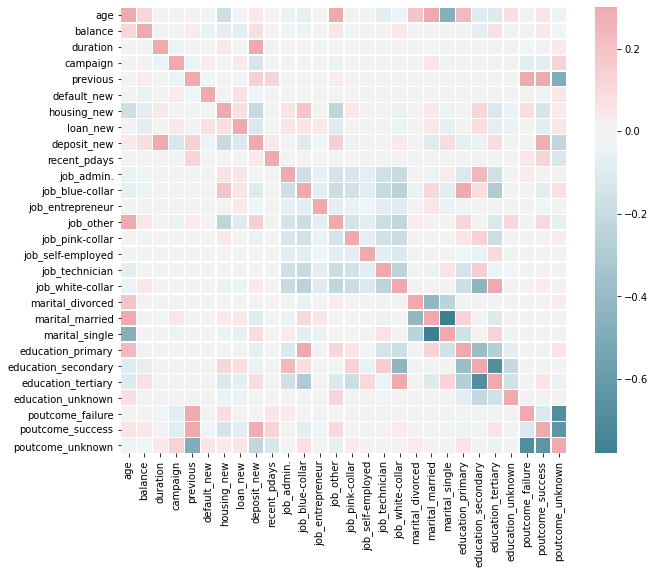

In [69]:
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(cr, xticklabels=cr.columns.values, yticklabels=cr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})

In [70]:
# Extract the deposte_new column (the dependent variable)

In [72]:
corr_deposite = pd.DataFrame(cr['deposit_new'].drop('deposit_new'))
corr_deposite.sort_values(by = 'deposit_new', ascending = False)

,deposit_new
duration,0.451919
poutcome_success,0.286642
job_other,0.144408
previous,0.139867
marital_single,0.094632
education_tertiary,0.094598
balance,0.081129
job_white-collar,0.036301
age,0.034901
recent_pdays,0.034457


# Build the Model

In [74]:
# Train-Test split: 20% test data

In [76]:
data_drop_deposit = bankc1.drop('deposit_new', 1)
label  = bankc1.deposit_new
data_train, data_test, label_train, label_test = train_test_split(data_drop_deposit,label,test_size = 0.2, random_state = 50)

In [77]:
# Decision tree with depth = 2

In [78]:
dt2 = tree.DecisionTreeClassifier(random_state = 1, max_depth = 2)
dt2.fit(data_train, label_train)
dt2_score_train = dt2.score(data_train, label_train)
print('Training Score: ', dt2_score_train)
dt2_score_test = dt2.score(data_test, label_test)
print('Testing Score: ', dt2_score_test)

Training Score:  0.7285250307985217
Testing Score:  0.7268248992386923


In [ ]:
# Decision tree with depth = 3

In [80]:
dt3 = tree.DecisionTreeClassifier(random_state = 1, max_depth = 3)
dt3.fit(data_train, label_train)
dt3_score_train = dt3.score(data_train, label_train)
print('Training Score: ', dt3_score_train)
dt3_score_test = dt3.score(data_test, label_test)
print('Testing Score: ', dt3_score_test)

Training Score:  0.770411020271027
Testing Score:  0.7572772055530677


In [ ]:
# Decision tree with depth = 4


In [81]:
dt4 = tree.DecisionTreeClassifier(random_state=1, max_depth=4)
dt4.fit(data_train, label_train)
dt4_score_train = dt4.score(data_train, label_train)
print("Training score: ",dt4_score_train)
dt4_score_test = dt4.score(data_test, label_test)
print("Testing score: ",dt4_score_test)

Training score:  0.7885541494008288
Testing score:  0.774294670846395


In [82]:
# Decision tree with depth = 6

In [83]:
dt6 = tree.DecisionTreeClassifier(random_state=1, max_depth=6)
dt6.fit(data_train, label_train)
dt6_score_train = dt6.score(data_train, label_train)
print("Training score: ",dt6_score_train)
dt6_score_test = dt6.score(data_test, label_test)
print("Testing score: ",dt6_score_test)

Training score:  0.8080412140217269
Testing score:  0.7796686072548141


In [84]:
# Decision tree: To the full depth

In [85]:

dt1 = tree.DecisionTreeClassifier()
dt1.fit(data_train, label_train)
dt1_score_train = dt1.score(data_train, label_train)
print("Training score: ", dt1_score_train)
dt1_score_test = dt1.score(data_test, label_test)
print("Testing score: ", dt1_score_test)

Training score:  1.0
Testing score:  0.7308553515450067


# Compare Training and Testing scores for various tree depths used

In [89]:
print('{:10} {:20} {:20}'.format('depth','Training Score','Testing Score'))
print('{:10} {:20} {:20}'.format('------','-------------','--------------'))
print('{:1} {:>25} {:>20}'.format(2, dt2_score_train, dt2_score_test))
print('{:1} {:>25} {:>20}'.format(3, dt3_score_train, dt3_score_test))
print('{:1} {:>25} {:>20}'.format(4, dt4_score_train, dt4_score_test))
print('{:1} {:>25} {:>20}'.format(6, dt6_score_train, dt6_score_test))
print('{:1} {:>23} {:>20}'.format("max", dt1_score_train, dt1_score_test))


depth      Training Score       Testing Score       
------     -------------        --------------      
2        0.7285250307985217   0.7268248992386923
3         0.770411020271027   0.7572772055530677
4        0.7885541494008288    0.774294670846395
6        0.8080412140217269   0.7796686072548141
max                     1.0   0.7308553515450067


In [90]:
# Let's generate the decision tree for depth = 2
# Create a feature vector

In [95]:
features = bankc1.columns.tolist()

# Uncomment below to generate the digraph Tree.
#tree.export_graphviz(dt2, out_file='tree_depth_2.dot', feature_names=features)

In [96]:
# Two classes: 0 = not signed up,  1 = signed up
dt2.classes_

array([0, 1])

In [98]:
# Create a feature vector
features = data_drop_deposit.columns.tolist()

features

['age',
 'balance',
 'duration',
 'campaign',
 'previous',
 'default_new',
 'housing_new',
 'loan_new',
 'recent_pdays',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_other',
 'job_pink-collar',
 'job_self-employed',
 'job_technician',
 'job_white-collar',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'poutcome_failure',
 'poutcome_success',
 'poutcome_unknown']

In [99]:
# Investigate most important features with depth =2

In [100]:
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

# Fit the decision tree classifier
dt2.fit(data_train, label_train)

fi = dt2.feature_importances_


l = len(features)
for i in range(0,len(features)):
    print('{:.<20} {:3}'.format(features[i],fi[i]))

age................. 0.0
balance............. 0.0
duration............ 0.849306123902405
campaign............ 0.0
previous............ 0.0
default_new......... 0.0
housing_new......... 0.0
loan_new............ 0.0
recent_pdays........ 0.0
job_admin........... 0.0
job_blue-collar..... 0.0
job_entrepreneur.... 0.0
job_other........... 0.0
job_pink-collar..... 0.0
job_self-employed... 0.0
job_technician...... 0.0
job_white-collar.... 0.0
marital_divorced.... 0.0
marital_married..... 0.0
marital_single...... 0.0
education_primary... 0.0
education_secondary. 0.0
education_tertiary.. 0.0
education_unknown... 0.0
poutcome_failure.... 0.0
poutcome_success.... 0.15069387609759496
poutcome_unknown.... 0.0


# Predictions

In [101]:
# According to feature importance results, most importtant feature is the "Duration"
# Let's calculte statistics on Duration

In [102]:
print("Mean duration   : ", data_drop_deposit.duration.mean())
print("Maximun duration: ", data_drop_deposit.duration.max())
print("Minimum duration: ", data_drop_deposit.duration.min())

Mean duration   :  371.99381831213043
Maximun duration:  3881
Minimum duration:  2


In [107]:
# Get a row with poutcome_success = 1
#bank_with_dummies[(bank_with_dummies.poutcome_success == 1)]
data_drop_deposit.iloc[985]

age                      46.000000
balance                3354.000000
duration                522.000000
campaign                  1.000000
previous                  1.000000
default_new               0.000000
housing_new               1.000000
loan_new                  0.000000
recent_pdays              0.005747
job_admin.                0.000000
job_blue-collar           0.000000
job_entrepreneur          0.000000
job_other                 1.000000
job_pink-collar           0.000000
job_self-employed         0.000000
job_technician            0.000000
job_white-collar          0.000000
marital_divorced          1.000000
marital_married           0.000000
marital_single            0.000000
education_primary         0.000000
education_secondary       1.000000
education_tertiary        0.000000
education_unknown         0.000000
poutcome_failure          0.000000
poutcome_success          1.000000
poutcome_unknown          0.000000
Name: 985, dtype: float64

In [109]:
# Make predictions on the test set
preds = dt2.predict(data_test)

# Calculate accuracy
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(label_test, preds)))

# Make predictions on the test set using predict_proba
probs = dt2.predict_proba(data_test)[:,1]

# Calculate the AUC metric
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(label_test, probs)))


Accuracy score: 
0.7268248992386923

Area Under Curve: 
0.7880265888143609
